# Introduction
Sentiment Analysis is a use of natural language processing and text analytics to identify, extract and study the states of feature information systematically. Sentiment analysis is widely used for customer reviews and survey responses, as well as for applications in the social media and healthcare sectors. The basic task in sentiment analysis is classifying the feature or variable as positive, negative or neutral. The classification looks for emotional states such as happiness, sadness, anger, fear, surprise or many other conditions and trains these circumstances to predict the classifications.

My aim in this project is to build a model that can predict whether a given movie review is positive or negative using the dataset of IMDB movie reviews. The model can predict the classification based on the reviews given by the viewers by targeting certain words which define the exact emotion about the movie to classify it as positive or negative.
I have taken the dataset from Kaggle, shown in the link below
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
The above dataset contains 50,000 rows of data containing reviews and sentiments. 
After importing the data, I presented the text preprocessing techniques, modelled the data for sentiment analysis, trained the model and evaluated it. This can help me to recommend the viewers to watch a certain movie based on positive or negative responses.


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Importing the necessary libraries 

In [3]:
# Import the dataset
df2=pd.read_csv('IMDB.csv')
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Reading the IMDB Dataset file which has 50000 rows and 2 columns with the help of pandas library

# Data Preprocessing

In [4]:
# erasing certain characters
df2['review'] = df2['review'].str.replace('READ MORE','')

Clearing out the frequent words 'READ MORE' which contains in each row

In [5]:
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# 1.Convert to lower case

In [6]:
# Converting the characters to lower case 
df2 = df2.applymap(lambda s: s.lower() if type(s) == str else s)


C:\Users\Rishwanth Mithra\AppData\Local\Temp\ipykernel_10800\2276592559.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda s: s.lower() if type(s) == str else s)


Converting the input text into the same casing format so that they are treated in the same way. Using the lower() function, it is helpful for text featurization techniques.

In [162]:
df2

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


# Handle emoji's

In [163]:
# Handling the emoji's 
df2.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


Handling the emoji's to boost the classification accuracy and handle the out-of-vocabulary issue. Replacing the emoji's with the text gives the good result in representing the sentiment which can result in variety of positive and negative emotions using encode and decode functions.

# Remove special characters

In [7]:
import re

# Remove special characters 
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    # Replace special characters with empty string
    text = re.sub(pattern, '', text)
    return text

# Function to remove special characters
df2['review'] = df2['review'].apply(remove_special_characters)
print(df2)

                                                  review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production br br the filmin...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]


Removing the special characters and puntuations from the text data helps to standardize the process that treats the words having special characters and words not having to be one and the same. We are replacing the special characters with the empty string for each review in the dataset.

In [165]:
# Replacing the frequent word 
df2['review'] = df2['review'].str.replace(' br', '')
df2

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


We are replacing the word 'br' with empty string which can be seen repeatedly used for tags.

In [166]:
# Check for null values
df2['review'].isna().sum()

0

Checking for null values by using the isna() function.

In [168]:
df2

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


# Tokenizing the Data

In [169]:
# Import the nltk library
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# Tokenizing the data for certain range of rows
df2['review'][:1000]= df2['review'][:1000].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to C:\Users\Rishwanth
[nltk_data]     Mithra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [170]:
df2['review'][1001:2000]= df2['review'][1001:2000].apply(lambda x: word_tokenize(x))

In [171]:
df2['review'][2001:3000]= df2['review'][2001:3000].apply(lambda x: word_tokenize(x))

In [172]:
df2['review'][3001:4000]= df2['review'][3001:4000].apply(lambda x: word_tokenize(x))

In [173]:
df2['review'][4001:5000]= df2['review'][4001:5000].apply(lambda x: word_tokenize(x))

Tokenization breaks texts to smaller parts for machine to analyze the texts easily. The splitted parts are called tokens and these can be characters or words. The algorithms can feasibly identify the patterns as it makes machine to analyze and respond to human inputs. We are performing tokenization for first 5000 rows step by step having 1000 rows to be each interval. The reason for splitting the tokenization process is that processor does not consume huge memory and helps to convert the data into tokens faster.

In [174]:
# Assigning the data to a variable
data = df2[:5000]
data

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, theres, a, family, where, a, littl...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive
...,...,...
4995,"[an, interesting, slasher, film, with, multipl...",negative
4996,"[i, watched, this, series, when, it, first, ca...",positive
4997,"[once, again, jet, liings, his, charismatic, p...",positive
4998,"[i, rented, this, movie, after, hearing, chris...",negative


In [175]:
data2 = data

# Stopwords Removal 

In [176]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rishwanth
[nltk_data]     Mithra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [177]:
from nltk.corpus import stopwords

In [178]:
stopwords = nltk.corpus.stopwords.words('english')

In [179]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
data2['review']= data2['review'].apply(lambda x:remove_stopwords(x))

C:\Users\Rishwanth Mithra\AppData\Local\Temp\ipykernel_13036\1779144561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['review']= data2['review'].apply(lambda x:remove_stopwords(x))


In [180]:
data2

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
4995,"[interesting, slasher, film, multiple, suspect...",negative
4996,"[watched, series, first, came, 70si, 14, years...",positive
4997,"[jet, liings, charismatic, presence, movie, sc...",positive
4998,"[rented, movie, hearing, chris, gore, saying, ...",negative


# Lemmatization

In [181]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data2['review']=data2['review'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to C:\Users\Rishwanth
[nltk_data]     Mithra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Rishwanth Mithra\AppData\Local\Temp\ipykernel_13036\2250455064.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['review']=data2['review'].apply(lambda x:lemmatizer(x))


In [182]:
data2

,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
4995,"[interesting, slasher, film, multiple, suspect...",negative
4996,"[watched, series, first, came, 70si, 14, year,...",positive
4997,"[jet, liings, charismatic, presence, movie, sc...",positive
4998,"[rented, movie, hearing, chris, gore, saying, ...",negative


# Sequencing and Padding

In [27]:
!pip install tensorflow
import tensorflow
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [183]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data2['review'])
seq_token=tokenizer.texts_to_sequences(data2['review'])

In [184]:
seq_token

[[3,
  986,
  834,
  66,
  403,
  2140,
  181,
  322,
  2424,
  115,
  522,
  583,
  2281,
  20,
  26,
  2910,
  2140,
  22945,
  16758,
  15,
  474,
  123,
  115,
  232,
  28,
  1714,
  25,
  8803,
  5856,
  11379,
  25,
  782,
  1966,
  1527,
  514,
  323,
  474,
  2911,
  238,
  253,
  13355,
  373,
  2140,
  9882,
  249,
  7263,
  3934,
  2545,
  695,
  22946,
  802,
  1077,
  9883,
  413,
  5203,
  2232,
  1167,
  1937,
  2106,
  835,
  245,
  16759,
  13356,
  222,
  4934,
  3272,
  413,
  241,
  22947,
  3516,
  11380,
  5204,
  1484,
  846,
  2484,
  13357,
  13358,
  242,
  3182,
  4935,
  1583,
  9884,
  7949,
  34,
  141,
  5518,
  11,
  42,
  183,
  1180,
  25,
  526,
  94,
  28,
  25,
  475,
  2546,
  674,
  87,
  260,
  4269,
  2621,
  144,
  674,
  1213,
  674,
  22948,
  69,
  836,
  92,
  20,
  181,
  49,
  128,
  2910,
  1403,
  2194,
  315,
  42,
  1312,
  175,
  1252,
  1011,
  2140,
  89,
  5519,
  222,
  438,
  1270,
  474,
  474,
  5205,
  5857,
  1657,
  9885,
 

In [185]:
# padding (adding zero's to be equal to the length of big list)
seq_token = pad_sequences(seq_token)
seq_token.shape

(5000, 1371)

In [186]:
def output(val):
    if val=='positive':
        return 1
    else:
        return 0
data2['sentiment']= data2['sentiment'].apply(lambda x:output(x))

C:\Users\Rishwanth Mithra\AppData\Local\Temp\ipykernel_13036\1811155122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sentiment']= data2['sentiment'].apply(lambda x:output(x))


In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(seq_token, data2['sentiment'],test_size=0.2)

In [192]:
X_train.shape

(4000, 1371)

In [193]:
X_test.shape

(1000, 1371)

In [194]:
y_train.shape

(4000,)

In [195]:
y_test.shape

(1000,)

In [188]:
data2

,review,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, there, family, little, boy, jake, ...",0
4,"[petter, matteis, love, time, money, visually,...",1
...,...,...
4995,"[interesting, slasher, film, multiple, suspect...",0
4996,"[watched, series, first, came, 70si, 14, year,...",1
4997,"[jet, liings, charismatic, presence, movie, sc...",1
4998,"[rented, movie, hearing, chris, gore, saying, ...",0


# LSTM Model

In [333]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,MaxPooling1D, GlobalMaxPooling1D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2 
from keras.callbacks import EarlyStopping

In [349]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=1371))
#model.add(LSTM(units=50, kernel_regularizer=l2(0.1)))
#model.add(Bidirectional(layers.LSTM(100, return_sequences=True))),  # Add return_sequences=True
model.add(Bidirectional(layers.LSTM(units=50, kernel_regularizer=l2(0.1)))),
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [350]:
# Train the model
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
history = model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test),callbacks=[earlyStop])

Epoch 1/6
125/125 [==============================] - 264s 2s/step - loss: 6.2867 - accuracy: 0.6212 - val_loss: 1.4882 - val_accuracy: 0.8200
Epoch 2/6
125/125 [==============================] - 258s 2s/step - loss: 0.6822 - accuracy: 0.8577 - val_loss: 0.4548 - val_accuracy: 0.8270
Epoch 3/6
125/125 [==============================] - 259s 2s/step - loss: 0.2455 - accuracy: 0.9388 - val_loss: 0.5115 - val_accuracy: 0.7870
Epoch 3: early stopping


In [351]:
y_pred  = model.predict(X_test)

32/32 [==============================] - 18s 519ms/step


In [352]:
for each in range(len(y_pred)):
    if y_pred[each] > 0.5:
        y_pred[each] = 1
    else:
        y_pred[each] = 0

In [353]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       600
         1.0       0.69      0.84      0.76       400

    accuracy                           0.79      1000
   macro avg       0.78      0.80      0.78      1000
weighted avg       0.80      0.79      0.79      1000



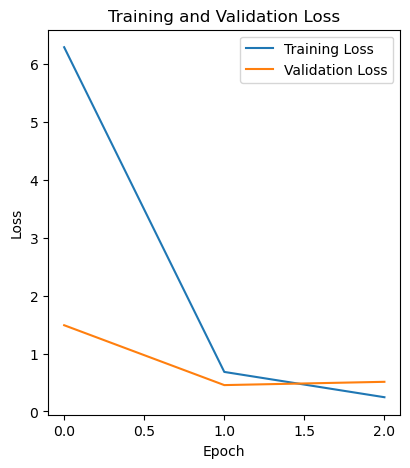

In [354]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# GRU

In [304]:
from tensorflow.keras.layers import Embedding, GRU

In [355]:
# Define the GRU model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=1371))
#model.add(LSTM(units=50, kernel_regularizer=l2(0.1)))
#model.add(Bidirectional(layers.LSTM(100, return_sequences=True))),  # Add return_sequences=True
model.add(Bidirectional(layers.GRU(units=50, kernel_regularizer=l2(0.1)))),
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [356]:
# Train the model
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
model.fit(X_train, y_train, epochs=6, batch_size=32, validation_data=(X_test, y_test),callbacks=[earlyStop])

Epoch 1/6
125/125 [==============================] - 258s 2s/step - loss: 6.5195 - accuracy: 0.5477 - val_loss: 1.8335 - val_accuracy: 0.5110
Epoch 2/6
125/125 [==============================] - 247s 2s/step - loss: 1.0176 - accuracy: 0.7107 - val_loss: 0.6085 - val_accuracy: 0.7300
Epoch 3/6
125/125 [==============================] - 247s 2s/step - loss: 0.4075 - accuracy: 0.8767 - val_loss: 0.5184 - val_accuracy: 0.7800
Epoch 4/6
125/125 [==============================] - 252s 2s/step - loss: 0.2254 - accuracy: 0.9473 - val_loss: 0.5128 - val_accuracy: 0.7860
Epoch 5/6
125/125 [==============================] - 252s 2s/step - loss: 0.1644 - accuracy: 0.9645 - val_loss: 0.4627 - val_accuracy: 0.8150
Epoch 6/6
125/125 [==============================] - 504s 4s/step - loss: 0.0783 - accuracy: 0.9890 - val_loss: 0.5583 - val_accuracy: 0.8140
Epoch 6: early stopping


In [357]:
y_pred  = model.predict(X_test)

32/32 [==============================] - 14s 408ms/step


In [359]:
for each in range(len(y_pred)):
    if y_pred[each] > 0.5:
        y_pred[each] = 1
    else:
        y_pred[each] = 0

In [360]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       513
           1       0.76      0.91      0.83       487

    accuracy                           0.81      1000
   macro avg       0.83      0.82      0.81      1000
weighted avg       0.83      0.81      0.81      1000



# CNN

In [361]:

# define model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=1371))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Adding dropout
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_54 (Embedding)    (None, 1371, 50)          2420500   
                                                                 
 conv1d_10 (Conv1D)          (None, 1369, 64)          9664      
                                                                 
 global_max_pooling1d_6 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 1)                 65        
                                                     

In [362]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=1)
model.fit(X_train, y_train, epochs=6,batch_size=32,callbacks=[earlyStop])


Epoch 1/6
125/125 [==============================] - 17s 126ms/step - loss: 1.1665 - accuracy: 0.5345
Epoch 2/6
125/125 [==============================] - 18s 145ms/step - loss: 0.7348 - accuracy: 0.5785
Epoch 3/6
125/125 [==============================] - 17s 139ms/step - loss: 0.6659 - accuracy: 0.6710
Epoch 4/6
125/125 [==============================] - 18s 140ms/step - loss: 0.5813 - accuracy: 0.7695
Epoch 5/6
125/125 [==============================] - 17s 138ms/step - loss: 0.4786 - accuracy: 0.8528
Epoch 6/6
125/125 [==============================] - 17s 137ms/step - loss: 0.3405 - accuracy: 0.9317


In [363]:
y_pred  = model.predict(X_test)

32/32 [==============================] - 0s 11ms/step


In [365]:
for each in range(len(y_pred)):
    if y_pred[each] > 0.5:
        y_pred[each] = 1
    else:
        y_pred[each] = 0

In [366]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       513
           1       0.76      0.75      0.75       487

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



# SVM

In [367]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score




In [368]:
# Convert tokenized sequences back to text
SVM_train_text = [' '.join(map(str, i)) for i in X_train]
SVM_test_text = [' '.join(map(str, j)) for j in X_test]

# Create TF-IDF vectorizer
SVM_vectorizer = TfidfVectorizer()
X_train_SVM = SVM_vectorizer.fit_transform(SVM_train_text)
X_test_SVM = SVM_vectorizer.transform(SVM_test_text)



In [369]:
# Initialize and train the SVM model
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train_SVM, y_train)



SVC(kernel='linear')

In [370]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_SVM)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.869


In [371]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       513
           1       0.86      0.87      0.87       487

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



# Random Forest

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [286]:
# Random Forest

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [287]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display other metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       513
           1       0.50      0.42      0.46       487

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



# Gradient Boosting

In [249]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score




In [251]:
# Initialize Gradient Boosting Classifier
gradboost_model = GradientBoostingClassifier()

# Train the model
gradboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradboost_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.53


# Naive Bayes Classifier

In [260]:
from sklearn.naive_bayes import MultinomialNB

In [261]:
# Instantiate Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Evaluate the classifier
accuracy = nb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.503
